In [1]:
# Coursera DeepLearningAI Course - Introduction to TensroFlow for AI, ML and DL
# Week 3 - Convolutional NN (MNIST dataset)

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [3]:
# MNIST fashion data set

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images_norm = train_images / 255.0
test_images_norm = test_images / 255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), # Input layer: Flatten = converting into 1-dimensional set
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), # Layer in the shape of the data
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)]) # Output layer -> 10 because of 10 labels

model.compile(optimizer=tf.optimizers.Adam(),
              loss = "sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images_norm, train_labels, epochs=5)

model.evaluate(test_images_norm, test_labels)

4423680/4422102 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6295 - accuracy: 0.7804
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3810 - accuracy: 0.8622
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3444 - accuracy: 0.8742
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3123 - accuracy: 0.8851
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3502 - accuracy: 0.8759


[0.3501925468444824, 0.8758999705314636]

In [4]:
# Accuracy of the training set - 89%, test set - 87.6 %

In [5]:
# CNN model

train_images_reshape = train_images.reshape(60000, 28,28,1) # Reshaping data into a single 4D list (single tensor)
test_images_reshape = test_images.reshape(10000, 28,28,1) # Reshaping data into a single 4D list (single tensor)
train_images_r_norm = train_images_reshape / 255.0
test_images_r_norm = test_images_reshape / 255.0

model = tf.keras.models.Sequential([
            # Adding a convolution: 32 - number of convolutions, (3,3) - size of the convolution (3x3 grid)
            tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
            # Pooling - compressing the image, (2,2) - 2x2 array of pixels -> turns 4 pixels into 1 by choosing the biggest pixel from 2x2 array
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
            tf.keras.layers.MaxPooling2D(2,2),                        
            tf.keras.layers.Flatten(), # Input layer: Flatten = converting into 1-dimensional set
            tf.keras.layers.Dense(128, activation=tf.nn.relu), # Layer in the shape of the data
            tf.keras.layers.Dense(10, activation=tf.nn.softmax)]) # Output layer -> 10 because of 10 labels

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [6]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss = "sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images_r_norm, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images_r_norm, test_labels)
print(test_acc)

Epoch 1/5
1875/1875 [==============================] - 9s 2ms/step - loss: 0.6170 - accuracy: 0.7755
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3128 - accuracy: 0.8862
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2595 - accuracy: 0.9037
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2250 - accuracy: 0.9171
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2563 - accuracy: 0.9076
0.9075999855995178


In [7]:
# CNN - 5 Epochs: Training set accuracy - 92.6 %, test set accuracy - 90.7 %

In [8]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss = "sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images_r_norm, train_labels, epochs=20)

test_loss, test_acc = model.evaluate(test_images_r_norm, test_labels)
print(test_acc)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1770 - accuracy: 0.9338
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1525 - accuracy: 0.9436
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1309 - accuracy: 0.9513
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1178 - accuracy: 0.9545
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1046 - accuracy: 0.9615
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0918 - accuracy: 0.9651
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0784 - accuracy: 0.9705
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0708 - accuracy: 0.9744
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0626 - accuracy: 0.9767
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.056

In [9]:
# CNN - 20 Epochs: Training set accuracy - 99 %, test set accuracy - 90.9 % -> Model significantly overfitted!!

In [11]:
class myCallback (tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):  # on_epoch_end: at the end of the epoch (only for training!)
    if(logs.get("accuracy")>0.92):
      print("\n Reached accuracy of 92%. Training cancelled")
      self.model.stop_training = True

callback = myCallback()
model.compile(optimizer=tf.optimizers.Adam(),
              loss = "sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images_r_norm, train_labels, epochs=15, callbacks=[callback])

test_loss, test_acc = model.evaluate(test_images_r_norm, test_labels)
print(test_acc)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0212 - accuracy: 0.9932

 Reached accuracy of 92%. Training cancelled
313/313 [==============================] - 1s 2ms/step - loss: 0.8827 - accuracy: 0.9117
0.9117000102996826


In [12]:
# Visualizing the Convolutions and Pooling

In [13]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


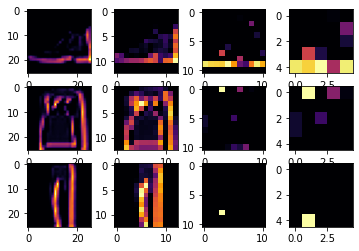

In [51]:
# Copied from the course notebook 
# -> Check this code in detail!

import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=1
THIRD_IMAGE=2
# CONVOLUTION_NUMBER = 31
# CONVOLUTION_NUMBER = 21 / 28
CONVOLUTION_NUMBER = 14
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images_r_norm[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images_r_norm[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images_r_norm[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

In [52]:
# CNN 2

model2 = tf.keras.models.Sequential([
            # Adding a convolution: 64 - number of convolutions, (3,3) - size of the convolution (3x3 grid)
            tf.keras.layers.Conv2D(64, (3,3), activation="relu", input_shape=(28,28,1)),
            # Pooling - compressing the image, (2,2) - 2x2 array of pixels -> turns 4 pixels into 1 by choosing the biggest pixel from 2x2 array
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
            tf.keras.layers.MaxPooling2D(2,2),                        
            tf.keras.layers.Flatten(), # Input layer: Flatten = converting into 1-dimensional set
            tf.keras.layers.Dense(128, activation=tf.nn.relu), # Layer in the shape of the data
            tf.keras.layers.Dense(10, activation=tf.nn.softmax)]) # Output layer -> 10 because of 10 labels

model2.summary()

model2.compile(optimizer=tf.optimizers.Adam(),
              loss = "sparse_categorical_crossentropy",
              metrics=["accuracy"])
model2.fit(train_images_r_norm, train_labels, epochs=5)

test_loss, test_acc = model2.evaluate(test_images_r_norm, test_labels)
print(test_acc)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

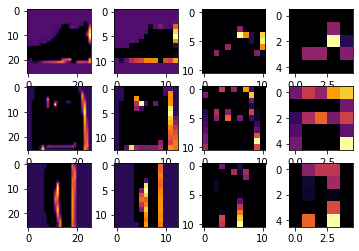

In [61]:
# Copied from the course notebook 
# -> Check this code in detail!

f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=1
THIRD_IMAGE=2
# CONVOLUTION_NUMBER = 31
# CONVOLUTION_NUMBER = 21 / 28
CONVOLUTION_NUMBER = 16
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model2.layers]
activation_model = tf.keras.models.Model(inputs = model2.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images_r_norm[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images_r_norm[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images_r_norm[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

In [63]:
# Questions:

# 1. Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.
# 2. Remove the final Convolution. What impact will this have on accuracy or training time?
# 3.  How about adding more Convolutions? What impact do you think this will have? Experiment with it.
# 4. Remove all Convolutions but the first. What impact do you think this will have? Experiment with it.


In [62]:
# Exercise with MINT dataset

# Improve MNIST to 99.8% accuracy or more using only a single convolutional layer and 
# a single MaxPooling 2D. You should stop training once the accuracy goes above this amount. 
# It should happen in less than 20 epochs

In [69]:
# load dataset
mnist = tf.keras.datasets.mnist
(train_images_hw, train_labels_hw), (test_images_hw, test_labels_hw) = mnist.load_data()

# Prepare data
train_images_hw_reshape = train_images_hw.reshape(60000, 28,28,1) # Reshaping data into a single 4D list (single tensor)
test_images_hw_reshape = test_images_hw.reshape(10000, 28,28,1) # Reshaping data into a single 4D list (single tensor)
train_images_hw_r_norm = train_images_hw_reshape / 255.0
test_images_hw_r_norm = test_images_hw_reshape / 255.0

# Create model
model_hw = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(64, (3,3), activation="relu", input_shape=(28,28,1)),
            tf.keras.layers.MaxPooling2D(2,2),                        
            tf.keras.layers.Flatten(), # Input layer: Flatten = converting into 1-dimensional set
            tf.keras.layers.Dense(128, activation=tf.nn.relu), # Layer in the shape of the data
            tf.keras.layers.Dense(10, activation=tf.nn.softmax)]) # Output layer -> 10 because of 10 labels

model_hw.summary()

model_hw.compile(optimizer="adam",
                  loss = "sparse_categorical_crossentropy",
                  metrics=["accuracy"])

# Use callback function to stop training by 99.8% accuracy
class myCallback_hw (tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):  # on_epoch_end: at the end of the epoch (only for training!)
    if(logs.get("accuracy")>0.998):
      print("\n Reached accuracy of 99.8%. Training cancelled")
      self.model.stop_training = True

callback_hw = myCallback_hw()

# Train model
model_hw.fit(train_images_hw_r_norm, train_labels_hw, epochs=10, callbacks=[callback_hw])

# Evaluate model
test_loss, test_acc = model_hw.evaluate(test_images_hw_r_norm, test_labels_hw)

print(test_acc)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               1384576   
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2648 - accuracy: 0.9200
Epoch 2/